Prediksi Sleep Disorder Menggunakan Algoritma Random Forest

Kelompok 7

Fahturomi Anjar Septian	2305110040

Rizal Ramadhan	        2305110046

Rama Fahrizal Kusuma	2305110049

In [7]:
import pandas as pd

df = pd.read_csv("data/Sleep_health_and_lifestyle_dataset.csv")
print(df)


     Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6   Overweight   
1                

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# =====================================================
# 1️⃣ LOAD DATA
# =====================================================
df = pd.read_csv("data/Sleep_health_and_lifestyle_dataset.csv")

In [9]:
# Hapus kolom yang tidak relevan
if 'Person ID' in df.columns:
    df = df.drop(columns=['Person ID'])

# Bersihkan dan encode data kategorikal
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})
df['Occupation'] = df['Occupation'].astype('category').cat.codes
df['BMI Category'] = df['BMI Category'].astype('category').cat.codes
if 'Age Group' in df.columns:
    df['Age Group'] = df['Age Group'].astype('category').cat.codes

df['Sleep Disorder'] = (
    df['Sleep Disorder']
    .replace({'None': 0, 'Sleep Apnea': 1, 'Insomnia': 1})
    .fillna(0)
    .astype(int)
)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23916\1203584372.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23916\1203584372.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'None': 0, 'Sleep Apnea': 1, 'Insomnia': 1})


In [10]:
df[10:20]

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
10,1,29,1,6.1,6,30,8,0,120/80,70,8000,0
11,1,29,1,7.8,7,75,6,0,120/80,70,8000,0
12,1,29,1,6.1,6,30,8,0,120/80,70,8000,0
13,1,29,1,6.0,6,30,8,0,120/80,70,8000,0
14,1,29,1,6.0,6,30,8,0,120/80,70,8000,0
15,1,29,1,6.0,6,30,8,0,120/80,70,8000,0
16,0,29,5,6.5,5,40,7,1,132/87,80,4000,1
17,1,29,1,6.0,6,30,8,0,120/80,70,8000,1
18,0,29,5,6.5,5,40,7,1,132/87,80,4000,1
19,1,30,1,7.6,7,75,6,0,120/80,70,8000,0


In [11]:
df[10:20]

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
10,1,29,1,6.1,6,30,8,0,120/80,70,8000,0
11,1,29,1,7.8,7,75,6,0,120/80,70,8000,0
12,1,29,1,6.1,6,30,8,0,120/80,70,8000,0
13,1,29,1,6.0,6,30,8,0,120/80,70,8000,0
14,1,29,1,6.0,6,30,8,0,120/80,70,8000,0
15,1,29,1,6.0,6,30,8,0,120/80,70,8000,0
16,0,29,5,6.5,5,40,7,1,132/87,80,4000,1
17,1,29,1,6.0,6,30,8,0,120/80,70,8000,1
18,0,29,5,6.5,5,40,7,1,132/87,80,4000,1
19,1,30,1,7.6,7,75,6,0,120/80,70,8000,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    int64  
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    int8   
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    int8   
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    int32  
dtypes: float64(1), int32(1), int64(7), int8(2), object(1)
memory usage: 28.6+ KB


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    int64  
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    int8   
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    int8   
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    int32  
dtypes: float64(1), int32(1), int64(7), int8(2), object(1)
memory usage: 28.6+ KB


In [14]:
df.describe()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,0.505348,42.184492,3.772727,7.132086,7.312834,59.171123,5.385027,1.296791,70.165775,6816.844920,0.414439
std,0.500641,8.673133,3.056081,0.795657,1.196956,20.830804,1.774526,1.431226,4.135676,1617.915679,0.493285
min,0.000000,27.000000,0.000000,5.800000,4.000000,30.000000,3.000000,0.000000,65.000000,3000.000000,0.000000
25%,0.000000,35.250000,1.000000,6.400000,6.000000,45.000000,4.000000,0.000000,68.000000,5600.000000,0.000000
50%,1.000000,43.000000,3.000000,7.200000,7.000000,60.000000,5.000000,0.000000,70.000000,7000.000000,0.000000
75%,1.000000,50.000000,5.000000,7.800000,8.000000,75.000000,7.000000,3.000000,72.000000,8000.000000,1.000000
max,1.000000,59.000000,10.000000,8.500000,9.000000,90.000000,8.000000,3.000000,86.000000,10000.000000,1.000000


In [15]:
df.describe()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,0.505348,42.184492,3.772727,7.132086,7.312834,59.171123,5.385027,1.296791,70.165775,6816.844920,0.414439
std,0.500641,8.673133,3.056081,0.795657,1.196956,20.830804,1.774526,1.431226,4.135676,1617.915679,0.493285
min,0.000000,27.000000,0.000000,5.800000,4.000000,30.000000,3.000000,0.000000,65.000000,3000.000000,0.000000
25%,0.000000,35.250000,1.000000,6.400000,6.000000,45.000000,4.000000,0.000000,68.000000,5600.000000,0.000000
50%,1.000000,43.000000,3.000000,7.200000,7.000000,60.000000,5.000000,0.000000,70.000000,7000.000000,0.000000
75%,1.000000,50.000000,5.000000,7.800000,8.000000,75.000000,7.000000,3.000000,72.000000,8000.000000,1.000000
max,1.000000,59.000000,10.000000,8.500000,9.000000,90.000000,8.000000,3.000000,86.000000,10000.000000,1.000000



=== Korelasi Fitur terhadap Gangguan Tidur ===
BMI Category             : +0.797 (positif)
Occupation               : +0.580 (positif)
Age                      : +0.432 (positif)
Sleep Duration           : -0.339 (negatif)
Heart Rate               : +0.330 (positif)
Quality of Sleep         : -0.311 (negatif)
Gender                   : -0.286 (negatif)
Stress Level             : +0.182 (positif)
Physical Activity Level  : +0.070 (positif)
Daily Steps              : -0.027 (negatif)


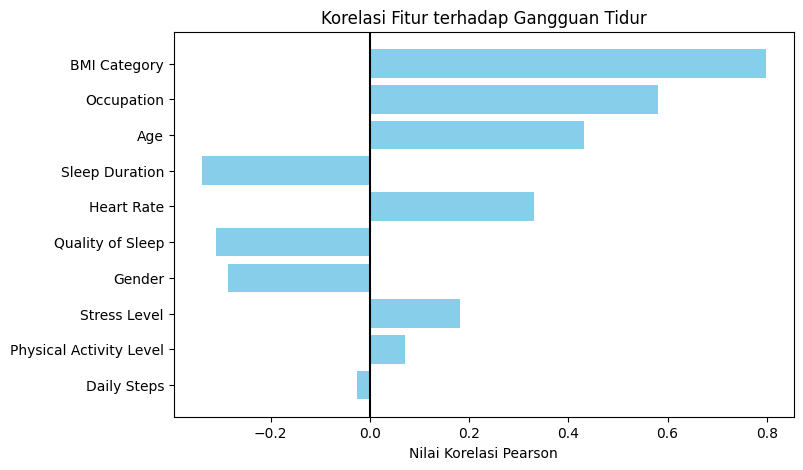

In [16]:
# =====================================================
# 2️⃣ KORELASI FITUR
# =====================================================
y = df['Sleep Disorder'].values
correlations = {}
for col in df.columns:
    if col != 'Sleep Disorder' and np.issubdtype(df[col].dtype, np.number):
        correlations[col] = np.corrcoef(df[col], y)[0, 1]

sorted_corr = dict(sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True))
print("\n=== Korelasi Fitur terhadap Gangguan Tidur ===")
for k, v in sorted_corr.items():
    arah = "positif" if v > 0 else "negatif"
    print(f"{k:25s}: {v:+.3f} ({arah})")

# Grafik korelasi
plt.figure(figsize=(8, 5))
plt.barh(list(sorted_corr.keys()), list(sorted_corr.values()), color='skyblue')
plt.title("Korelasi Fitur terhadap Gangguan Tidur")
plt.xlabel("Nilai Korelasi Pearson")
plt.gca().invert_yaxis()
plt.axvline(0, color='black')
plt.show()


In [17]:
# =====================================================
# 3️⃣ PERSIAPAN DATA
# =====================================================
numeric_cols = [c for c in df.columns if c not in ['Person ID', 'Sleep Disorder'] and np.issubdtype(df[c].dtype, np.number)]
X = df[numeric_cols].values.astype(float)
X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0) + 1e-8)
y = df['Sleep Disorder'].values

In [18]:
X[1,:]

array([0.99999999, 0.03125   , 0.1       , 0.14814815, 0.4       ,
       0.5       , 1.        , 0.        , 0.47619048, 1.        ])

In [19]:
# =====================================================
# 4️⃣ RANDOM FOREST MANUAL
# =====================================================
def gini(y):
    if len(y) == 0:
        return 0
    p = np.mean(y)
    return 2 * p * (1 - p)

def split_data(X, y, feature, threshold):
    left = X[:, feature] < threshold
    right = ~left
    return X[left], y[left], X[right], y[right]

def best_split(X, y):
    best_gini = 1
    best_feat, best_thr = None, None
    for feat in range(X.shape[1]):
        for thr in np.unique(X[:, feat]):
            _, y_left, _, y_right = split_data(X, y, feat, thr)
            g = (len(y_left)*gini(y_left) + len(y_right)*gini(y_right)) / len(y)
            if g < best_gini:
                best_gini, best_feat, best_thr = g, feat, thr
    return best_feat, best_thr

def build_tree(X, y, depth=0, max_depth=3):
    if len(set(y)) == 1 or depth == max_depth:
        return {'label': np.round(np.mean(y))}
    feat, thr = best_split(X, y)
    if feat is None:
        return {'label': np.round(np.mean(y))}
    X_left, y_left, X_right, y_right = split_data(X, y, feat, thr)
    return {
        'feature': feat,
        'threshold': thr,
        'left': build_tree(X_left, y_left, depth+1, max_depth),
        'right': build_tree(X_right, y_right, depth+1, max_depth)
    }

def predict_tree(tree, x):
    if 'label' in tree:
        return tree['label']
    if x[tree['feature']] < tree['threshold']:
        return predict_tree(tree['left'], x)
    else:
        return predict_tree(tree['right'], x)

def random_forest(X, y, n_trees=5, max_depth=3):
    trees = []
    for _ in range(n_trees):
        idx = np.random.choice(len(X), len(X), replace=True)
        trees.append(build_tree(X[idx], y[idx], max_depth=max_depth))
    return trees

def predict_forest(trees, X):
    preds = np.array([[predict_tree(t, x) for t in trees] for x in X])
    return np.round(preds.mean(axis=1))

In [20]:
start = 10
end = 20
X_train = np.concatenate([X[:start], X[end:]])
y_train = np.concatenate([y[:start], y[end:]])
model_trial = random_forest(X_train, y_train)

In [21]:
X_val, y_val = X[start:end], y[start:end]
y_pred = predict_forest(model_trial, X_val)

In [22]:
y_pred

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0.])

In [23]:
len(y_pred)

10

n_trees=3, max_depth=2 → CV Akurasi: 90.27%
n_trees=3, max_depth=3 → CV Akurasi: 90.00%


C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


n_trees=3, max_depth=4 → CV Akurasi: 90.54%
n_trees=5, max_depth=2 → CV Akurasi: 89.46%
n_trees=5, max_depth=3 → CV Akurasi: 90.27%
n_trees=5, max_depth=4 → CV Akurasi: 88.92%
n_trees=7, max_depth=2 → CV Akurasi: 89.19%
n_trees=7, max_depth=3 → CV Akurasi: 90.27%
n_trees=7, max_depth=4 → CV Akurasi: 87.30%

Parameter terbaik: n_trees=3, max_depth=4
Akurasi rata-rata terbaik (CV): 90.54%


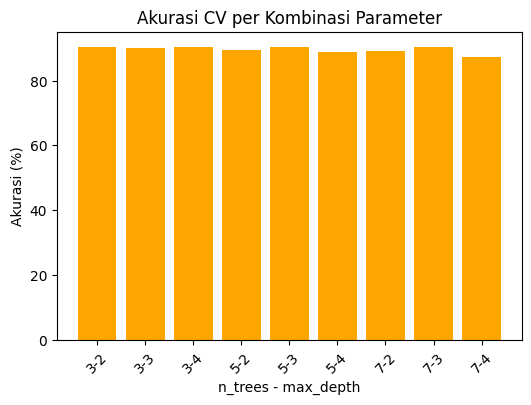

In [24]:
# =====================================================
# 5️⃣ CROSS VALIDATION + GRID SEARCH
# =====================================================
def cross_val_score(X, y, n_trees, max_depth, k=5):
    fold_size = len(X) // k
    scores = []
    for i in range(k):
        start, end = i * fold_size, (i + 1) * fold_size
        X_val, y_val = X[start:end], y[start:end]
        X_train = np.concatenate([X[:start], X[end:]])
        y_train = np.concatenate([y[:start], y[end:]])
        model = random_forest(X_train, y_train, n_trees=n_trees, max_depth=max_depth)
        y_pred = predict_forest(model, X_val)
        acc = np.mean(y_pred == y_val)
        scores.append(acc)
    return np.mean(scores)

grid_params = {
    'n_trees': [3, 5, 7],
    'max_depth': [2, 3, 4]
}

cv_results = []
best_score = 0
best_params = None
for n_trees in grid_params['n_trees']:
    for max_depth in grid_params['max_depth']:
        score = cross_val_score(X, y, n_trees, max_depth)
        cv_results.append((n_trees, max_depth, score))
        print(f"n_trees={n_trees}, max_depth={max_depth} → CV Akurasi: {score*100:.2f}%")
        if score > best_score:
            best_score = score
            best_params = (n_trees, max_depth)

print(f"\nParameter terbaik: n_trees={best_params[0]}, max_depth={best_params[1]}")
print(f"Akurasi rata-rata terbaik (CV): {best_score*100:.2f}%")

# Grafik hasil grid search
plt.figure(figsize=(6, 4))
labels = [f"{nt}-{md}" for nt, md, _ in cv_results]
scores = [s*100 for _, _, s in cv_results]
plt.bar(labels, scores, color='orange')
plt.title("Akurasi CV per Kombinasi Parameter")
plt.ylabel("Akurasi (%)")
plt.xlabel("n_trees - max_depth")
plt.xticks(rotation=45)
plt.show()

In [25]:
def print_tree(tree, feature_names, indent=""):
    node = tree
    if "value" in node:  # node leaf
        print(indent + f"Leaf → Class: {node['value']}")
        return

    feature = feature_names[node["feature_index"]]
    threshold = node["threshold"]
    print(indent + f"[{feature} ≤ {threshold}]")

    print(indent + "├── True:")
    print_tree(node["left"], feature_names, indent + "│   ")

    print(indent + "└── False:")
    print_tree(node["right"], feature_names, indent + "    ")


In [26]:
# =====================================================
# 6️⃣ EVALUASI FINAL MODEL
# =====================================================
np.random.seed(42)
idx = np.arange(len(X))
np.random.shuffle(idx)
split = int(0.9 * len(X))
X_train, X_test = X[idx[:split]], X[idx[split:]]
y_train, y_test = y[idx[:split]], y[idx[split:]]

best_forest = random_forest(X_train, y_train, n_trees=best_params[0], max_depth=best_params[1])
y_pred = predict_forest(best_forest, X_test)

TP = np.sum((y_test == 1) & (y_pred == 1))
TN = np.sum((y_test == 0) & (y_pred == 0))
FP = np.sum((y_test == 0) & (y_pred == 1))
FN = np.sum((y_test == 1) & (y_pred == 0))

accuracy = (TP + TN) / len(y_test)
precision = TP / (TP + FP + 1e-8)
recall = TP / (TP + FN + 1e-8)
f1 = 2 * (precision * recall) / (precision + recall + 1e-8)

print("\n=== Evaluasi Model Akhir ===")
print(f"Akurasi  : {accuracy*100:.2f}%")
print(f"Presisi  : {precision*100:.2f}%")
print(f"Recall   : {recall*100:.2f}%")
print(f"F1-Score : {f1*100:.2f}%")




=== Evaluasi Model Akhir ===
Akurasi  : 92.11%
Presisi  : 83.33%
Recall   : 100.00%
F1-Score : 90.91%


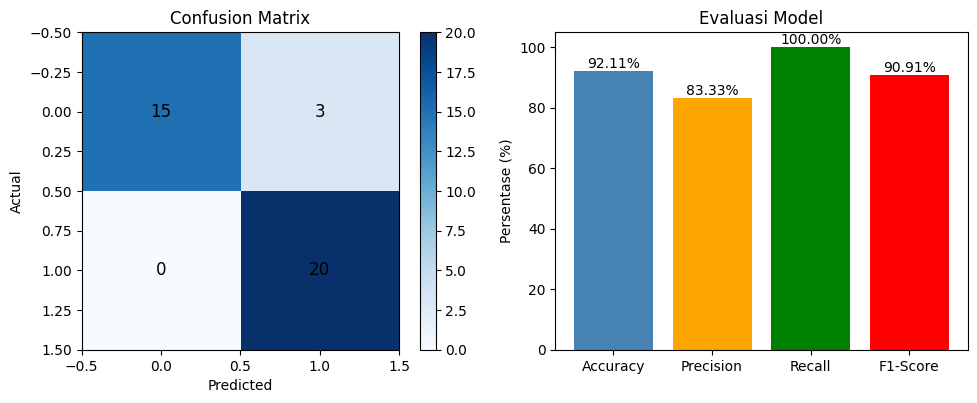

In [27]:
# =====================================================
# 7️⃣ VISUALISASI CONFUSION MATRIX + GRAFIK METRIK
# =====================================================
conf_matrix = np.array([[TP, FP],
                        [FN, TN]])

plt.figure(figsize=(10,4))

# Confusion Matrix
plt.subplot(1, 2, 1)
plt.imshow(conf_matrix, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
for i in range(2):
    for j in range(2):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black', fontsize=12)
plt.colorbar()

# Grafik evaluasi
plt.subplot(1, 2, 2)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy*100, precision*100, recall*100, f1*100]
plt.bar(metrics, values, color=['steelblue', 'orange', 'green', 'red'])
plt.title("Evaluasi Model")
plt.ylabel("Persentase (%)")
for i, v in enumerate(values):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center')
plt.tight_layout()
plt.show()

Pastikan file 'Sleep_health_and_lifestyle_dataset.csv' ada di folder /content/

=== Korelasi Fitur terhadap Gangguan Tidur ===
Age                      : +0.123 (positif)
Quality of Sleep         : +0.078 (positif)
Stress Level             : +0.059 (positif)
Daily Steps              : -0.045 (negatif)
Physical Activity Level  : -0.038 (negatif)
Gender                   : -0.033 (negatif)
Sleep Duration           : +0.023 (positif)
Diastolic BP             : -0.021 (negatif)
Systolic BP              : +0.012 (positif)
Heart Rate               : +0.012 (positif)
Occupation               : +0.008 (positif)
BMI Category             : -0.004 (negatif)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23916\61870378.py:35: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23916\61870378.py:42: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'None': 0, 'Sleep Apnea': 1, 'Insomnia': 1})


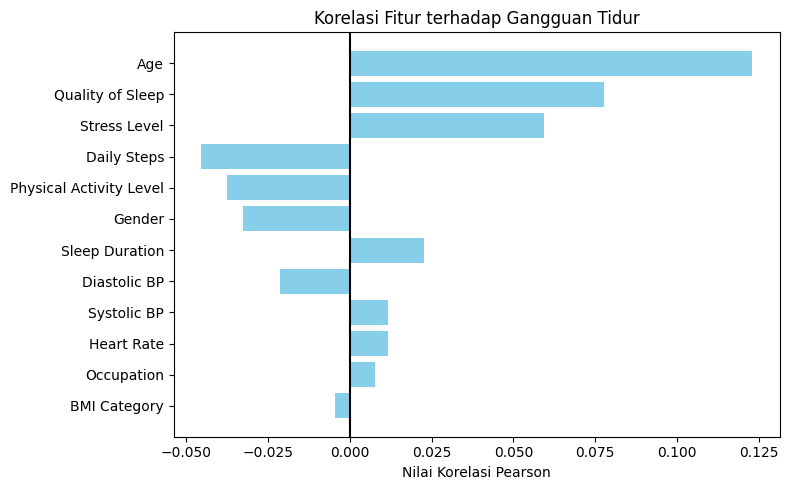


=== Menjalankan Grid Search CV ===
n_trees=3, max_depth=2 → CV Akurasi: 67.03%
n_trees=3, max_depth=3 → CV Akurasi: 67.03%
n_trees=3, max_depth=4 → CV Akurasi: 64.86%
n_trees=5, max_depth=2 → CV Akurasi: 65.68%
n_trees=5, max_depth=3 → CV Akurasi: 67.84%
n_trees=5, max_depth=4 → CV Akurasi: 66.76%
n_trees=7, max_depth=2 → CV Akurasi: 68.65%
n_trees=7, max_depth=3 → CV Akurasi: 66.76%
n_trees=7, max_depth=4 → CV Akurasi: 67.30%

Parameter terbaik: n_trees=7, max_depth=2
Akurasi rata-rata terbaik (CV): 68.65%


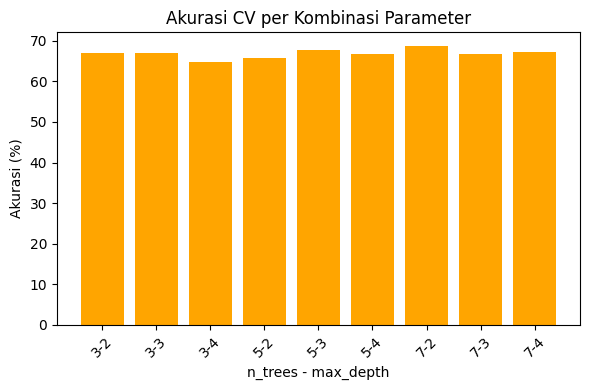


=== Evaluasi Model Akhir ===
Akurasi  : 68.42%
Presisi  : 68.42%
Recall   : 100.00%
F1-Score : 81.25%


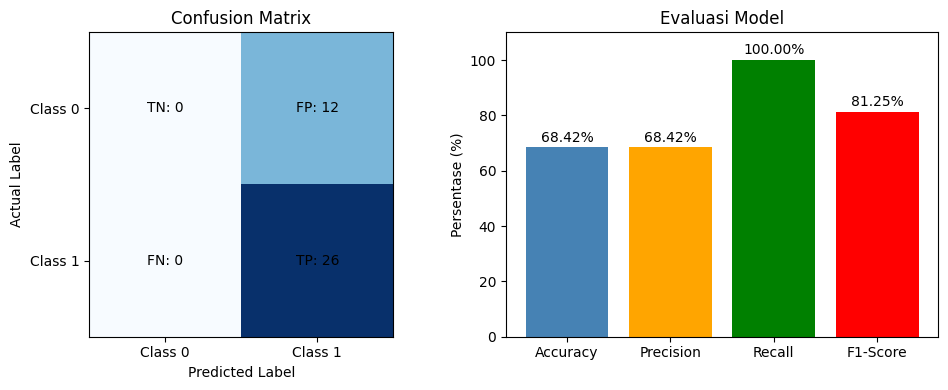

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# =====================================================
# 1️⃣ LOAD DATA
# =====================================================
try:
    df = pd.read_csv("/content/Sleep_health_and_lifestyle_dataset.csv")
except FileNotFoundError:
    print("Pastikan file 'Sleep_health_and_lifestyle_dataset.csv' ada di folder /content/")
    # Data dummy jika file tidak ada
    data = {
        'Gender': np.random.choice(['Male', 'Female'], 374), 'Age': np.random.randint(20, 60, 374),
        'Occupation': np.random.choice(['Doctor', 'Teacher', 'Engineer'], 374), 'Sleep Duration': np.random.uniform(5, 9, 374),
        'Quality of Sleep': np.random.randint(4, 10, 374), 'Physical Activity Level': np.random.randint(30, 90, 374),
        'Stress Level': np.random.randint(1, 8, 374), 'BMI Category': np.random.choice(['Normal', 'Overweight', 'Obese'], 374),
        'Blood Pressure': [f"{np.random.randint(110, 140)}/{np.random.randint(70, 90)}" for _ in range(374)],
        'Heart Rate': np.random.randint(60, 85, 374), 'Daily Steps': np.random.randint(3000, 10000, 374),
        'Sleep Disorder': np.random.choice(['None', 'Sleep Apnea', 'Insomnia'], 374)
    }
    df = pd.DataFrame(data)

if 'Person ID' in df.columns:
    df = df.drop(columns=['Person ID'])
if 'Blood Pressure' in df.columns:
    try:
        bp_split = df['Blood Pressure'].str.split('/', expand=True).astype(float)
        df['Systolic BP'] = bp_split[0]
        df['Diastolic BP'] = bp_split[1]
        df = df.drop(columns=['Blood Pressure'])
    except Exception as e:
        if 'Blood Pressure' in df.columns: df = df.drop(columns=['Blood Pressure'])

df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})
df['Occupation'] = df['Occupation'].astype('category').cat.codes
df['BMI Category'] = df['BMI Category'].astype('category').cat.codes
if 'Age Group' in df.columns:
    df['Age Group'] = df['Age Group'].astype('category').cat.codes
df['Sleep Disorder'] = (
    df['Sleep Disorder']
    .replace({'None': 0, 'Sleep Apnea': 1, 'Insomnia': 1})
    .fillna(0)
    .astype(int)
)

# =====================================================
# 2️⃣ KORELASI FITUR
# =====================================================
y_corr = df['Sleep Disorder'].values
correlations = {}
for col in df.columns:
    if col != 'Sleep Disorder' and np.issubdtype(df[col].dtype, np.number):
        correlations[col] = np.corrcoef(df[col], y_corr)[0, 1]
sorted_corr = dict(sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True))
print("\n=== Korelasi Fitur terhadap Gangguan Tidur ===")
for k, v in sorted_corr.items():
    arah = "positif" if v > 0 else "negatif"
    print(f"{k:25s}: {v:+.3f} ({arah})")
plt.figure(figsize=(8, 5))
plt.barh(list(sorted_corr.keys()), list(sorted_corr.values()), color='skyblue')
plt.title("Korelasi Fitur terhadap Gangguan Tidur")
plt.xlabel("Nilai Korelasi Pearson")
plt.gca().invert_yaxis()
plt.axvline(0, color='black')
plt.tight_layout()
plt.show()

# =====================================================
# 3️⃣ PERSIAPAN DATA
# =====================================================
numeric_cols = [c for c in df.columns if c not in ['Person ID', 'Sleep Disorder'] and np.issubdtype(df[c].dtype, np.number)]
X = df[numeric_cols].values.astype(float)
y = df['Sleep Disorder'].values
X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0) + 1e-8)

# =====================================================
# 4️⃣ RANDOM FOREST MANUAL (DEFINISI FUNGSI)
# =====================================================
def gini(y):
    if len(y) == 0: return 0
    p = np.mean(y)
    return 2 * p * (1 - p)

def split_data(X, y, feature, threshold):
    left_mask = X[:, feature] < threshold
    right_mask = ~left_mask
    return X[left_mask], y[left_mask], X[right_mask], y[right_mask]

def best_split(X, y):
    best_gini = 1
    best_feat, best_thr = None, None
    n_features = X.shape[1]
    for feat in range(n_features):
        thresholds = np.unique(X[:, feat])
        for thr in thresholds:
            X_left, y_left, X_right, y_right = split_data(X, y, feat, thr)
            if len(y_left) == 0 or len(y_right) == 0: continue
            g = (len(y_left)*gini(y_left) + len(y_right)*gini(y_right)) / len(y)
            if g < best_gini:
                best_gini, best_feat, best_thr = g, feat, thr
    return best_feat, best_thr

def build_tree(X, y, depth=0, max_depth=3):
    if len(set(y)) == 1 or depth == max_depth or len(y) == 0:
        if len(y) == 0: return {'label': 0}
        return {'label': np.round(np.mean(y))}
    feat, thr = best_split(X, y)
    if feat is None:
        return {'label': np.round(np.mean(y))}
    X_left, y_left, X_right, y_right = split_data(X, y, feat, thr)
    return {
        'feature': feat, 'threshold': thr,
        'left': build_tree(X_left, y_left, depth+1, max_depth),
        'right': build_tree(X_right, y_right, depth+1, max_depth)
    }

def predict_tree(tree, x):
    if 'label' in tree: return tree['label']
    if x[tree['feature']] < tree['threshold']:
        return predict_tree(tree['left'], x)
    else:
        return predict_tree(tree['right'], x)

def random_forest(X, y, n_trees=5, max_depth=3):
    trees = []
    for _ in range(n_trees):
        idx = np.random.choice(len(X), len(X), replace=True)
        X_sample, y_sample = X[idx], y[idx]
        trees.append(build_tree(X_sample, y_sample, max_depth=max_depth))
    return trees

def predict_forest(trees, X):
    preds_all_trees = np.array([[predict_tree(t, x) for t in trees] for x in X])
    return np.round(preds_all_trees.mean(axis=1))

# =====================================================
# 5️⃣ CROSS VALIDATION + GRID SEARCH
# =====================================================
def cross_val_score(X, y, n_trees, max_depth, k=5):
    fold_size = len(X) // k
    scores = []
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    X_shuffled, y_shuffled = X[indices], y[indices]
    for i in range(k):
        start, end = i * fold_size, (i + 1) * fold_size
        X_val, y_val = X_shuffled[start:end], y_shuffled[start:end]
        X_train = np.concatenate([X_shuffled[:start], X_shuffled[end:]])
        y_train = np.concatenate([y_shuffled[:start], y_shuffled[end:]])
        if len(X_train) == 0 or len(X_val) == 0: continue
        model = random_forest(X_train, y_train, n_trees=n_trees, max_depth=max_depth)
        y_pred = predict_forest(model, X_val)
        acc = np.mean(y_pred == y_val)
        scores.append(acc)
    return np.mean(scores) if scores else 0

grid_params = {'n_trees': [3, 5, 7], 'max_depth': [2, 3, 4]}
print("\n=== Menjalankan Grid Search CV ===")
cv_results = []
best_score = -1
best_params = None
for n_trees in grid_params['n_trees']:
    for max_depth in grid_params['max_depth']:
        score = cross_val_score(X, y, n_trees, max_depth)
        cv_results.append((n_trees, max_depth, score))
        print(f"n_trees={n_trees}, max_depth={max_depth} → CV Akurasi: {score*100:.2f}%")
        if score > best_score:
            best_score = score
            best_params = (n_trees, max_depth)
print(f"\nParameter terbaik: n_trees={best_params[0]}, max_depth={best_params[1]}")
print(f"Akurasi rata-rata terbaik (CV): {best_score*100:.2f}%")
plt.figure(figsize=(6, 4))
labels = [f"{nt}-{md}" for nt, md, _ in cv_results]
scores = [s*100 for _, _, s in cv_results]
plt.bar(labels, scores, color='orange')
plt.title("Akurasi CV per Kombinasi Parameter")
plt.ylabel("Akurasi (%)")
plt.xlabel("n_trees - max_depth")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# =====================================================
# 6️⃣ EVALUASI FINAL MODEL (BARIS INI MEMANGGIL random_forest)
# =====================================================
np.random.seed(42)
idx = np.arange(len(X))
np.random.shuffle(idx)
split = int(0.9 * len(X))
X_train, X_test = X[idx[:split]], X[idx[split:]]
y_train, y_test = y[idx[:split]], y[idx[split:]]

# Bagian ini akan BERHASIL JIKA Bagian 4 sudah dieksekusi
best_forest = random_forest(X_train, y_train, n_trees=best_params[0], max_depth=best_params[1])
y_pred = predict_forest(best_forest, X_test)

TP = np.sum((y_test == 1) & (y_pred == 1))
TN = np.sum((y_test == 0) & (y_pred == 0))
FP = np.sum((y_test == 0) & (y_pred == 1))
FN = np.sum((y_test == 1) & (y_pred == 0))
accuracy = (TP + TN) / (len(y_test) + 1e-8)
precision = TP / (TP + FP + 1e-8)
recall = TP / (TP + FN + 1e-8)
f1 = 2 * (precision * recall) / (precision + recall + 1e-8)
print("\n=== Evaluasi Model Akhir ===")
print(f"Akurasi  : {accuracy*100:.2f}%")
print(f"Presisi  : {precision*100:.2f}%")
print(f"Recall   : {recall*100:.2f}%")
print(f"F1-Score : {f1*100:.2f}%")

# =====================================================
# 7️⃣ VISUALISASI CONFUSION MATRIX + GRAFIK METRIK
# =====================================================
conf_matrix = np.array([[TN, FP], [FN, TP]])
plt.figure(figsize=(10, 4))
ax1 = plt.subplot(1, 2, 1)
im = ax1.imshow(conf_matrix, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
ax1.set_xticks([0, 1]); ax1.set_yticks([0, 1])
ax1.set_xticklabels(['Class 0', 'Class 1']); ax1.set_yticklabels(['Class 0', 'Class 1'])
for i in range(2):
    for j in range(2):
        val = conf_matrix[i, j]
        label = f"TN: {val}" if (i,j) == (0,0) else \
                f"FP: {val}" if (i,j) == (0,1) else \
                f"FN: {val}" if (i,j) == (1,0) else f"TP: {val}"
        ax1.text(j, i, label, ha='center', va='center', color='black', fontsize=10)
plt.subplot(1, 2, 2)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy*100, precision*100, recall*100, f1*100]
plt.bar(metrics, values, color=['steelblue', 'orange', 'green', 'red'])
plt.title("Evaluasi Model")
plt.ylabel("Persentase (%)")
plt.ylim(0, 110)
for i, v in enumerate(values):
    plt.text(i, v + 2, f"{v:.2f}%", ha='center')
plt.tight_layout()
plt.show()

In [29]:
def draw_tree(tree, feature_names, title="Pohon Keputusan"):
    plt.figure(figsize=(9,6))
    ax = plt.gca()
    ax.set_title(title, fontsize=14)
    ax.axis("off")

    def recurse(node, x=0.5, y=1.0, dx=0.25, dy=0.13):
        if 'label' in node:
            ax.text(x, y, f"Leaf\nPrediksi={int(node['label'])}",
                    ha='center', va='center',
                    bbox=dict(boxstyle="round,pad=0.4", fc="lightgreen"))
            return

        feat = node['feature']
        thr = node['threshold']
        feat_name = feature_names[feat]

        ax.text(x, y, f"{feat_name}\n< {thr:.3f}",
                ha='center', va='center',
                bbox=dict(boxstyle="round,pad=0.4", fc="lightblue"))

        # kiri
        ax.plot([x, x - dx], [y - 0.02, y - dy + 0.02], color="black")
        recurse(node['left'], x - dx, y - dy, dx * 0.6, dy)

        # kanan
        ax.plot([x, x + dx], [y - 0.02, y - dy + 0.02], color="black")
        recurse(node['right'], x + dx, y - dy, dx * 0.6, dy)

    recurse(tree)
    plt.show()


In [30]:
def visualize_forest_one_by_one(X, y, n_trees, max_depth, feature_names):
    forest = random_forest(X, y, n_trees=n_trees, max_depth=max_depth)

    for i, tree in enumerate(forest):
        title = f"Pohon Ke-{i+1} (n_trees={n_trees}, max_depth={max_depth})"
        draw_tree(tree, feature_names, title=title)


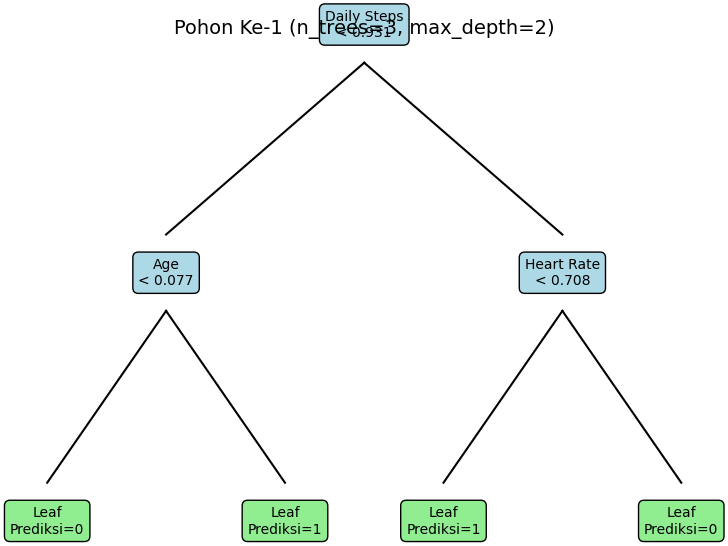

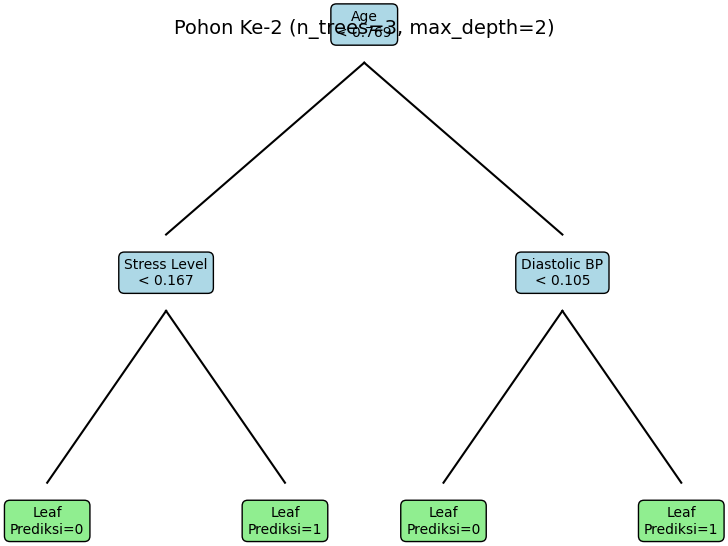

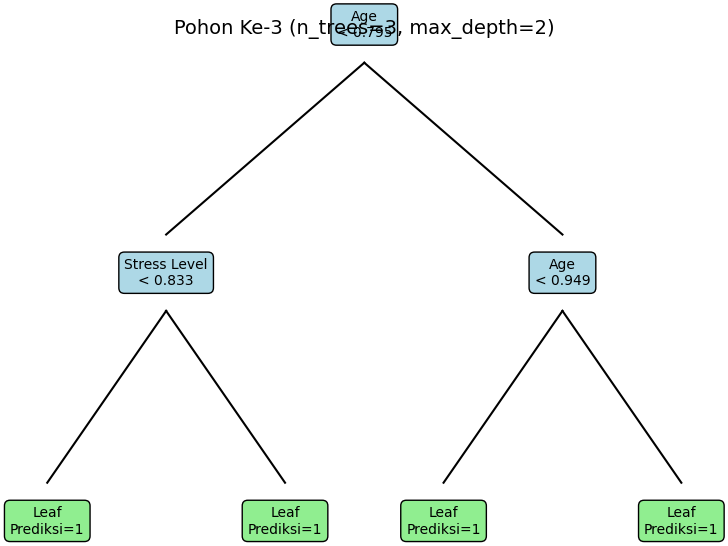

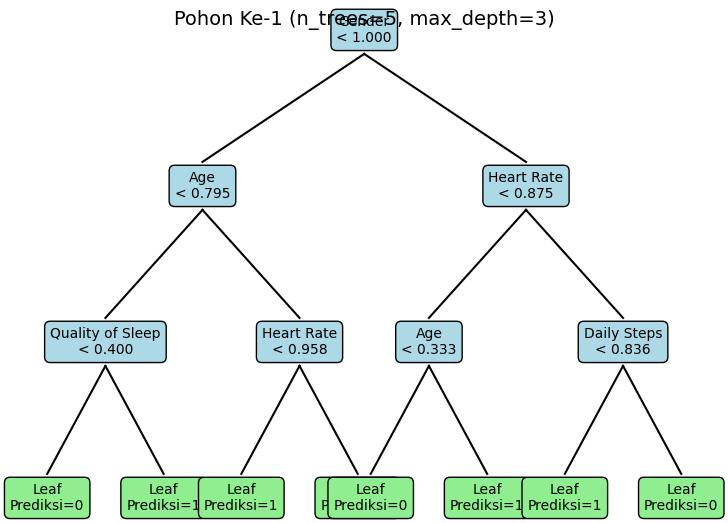

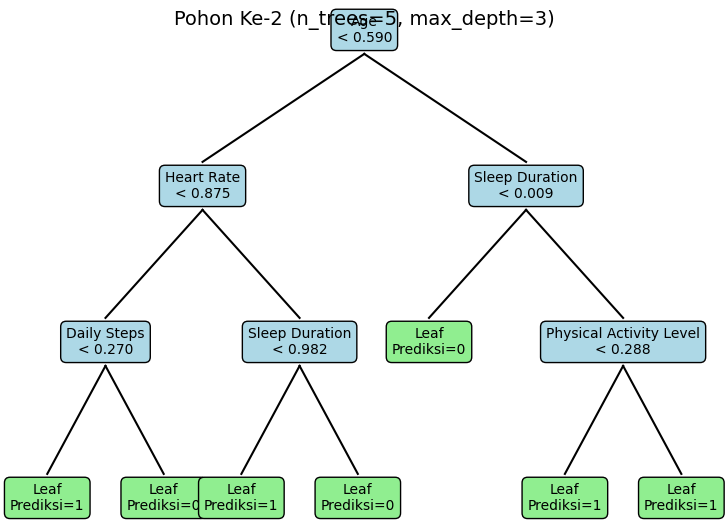

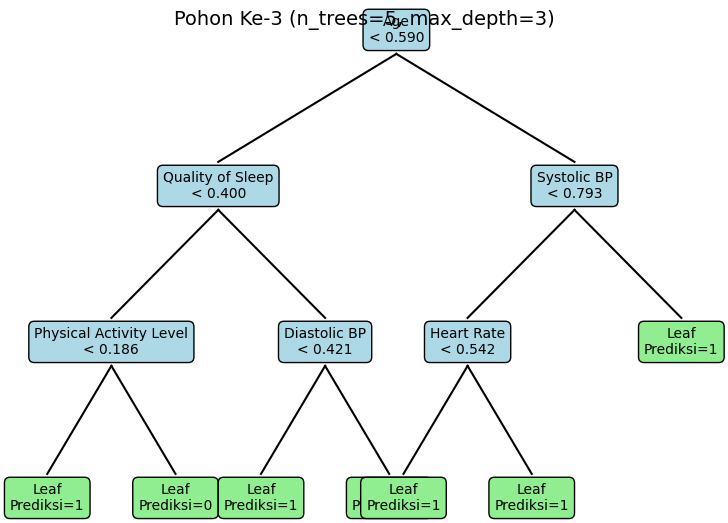

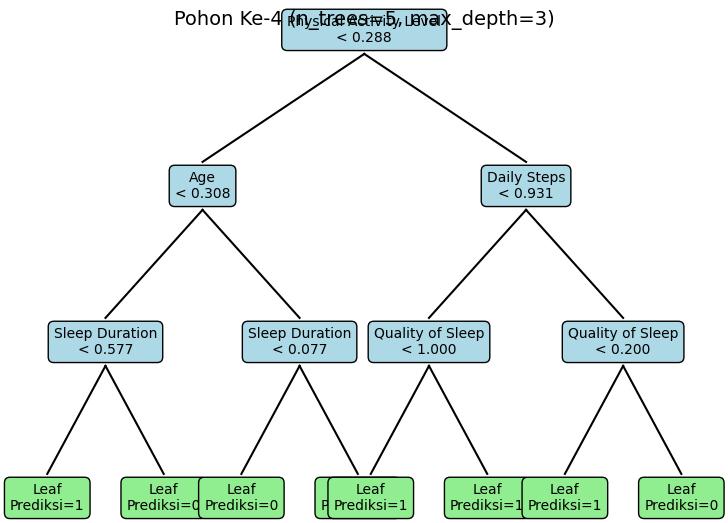

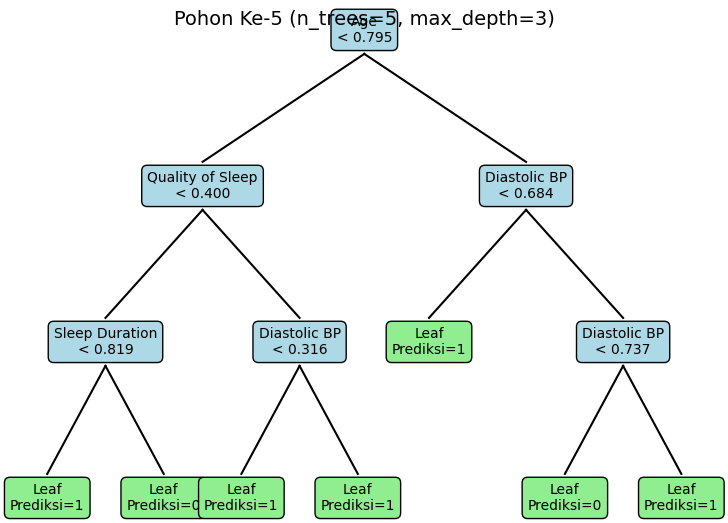

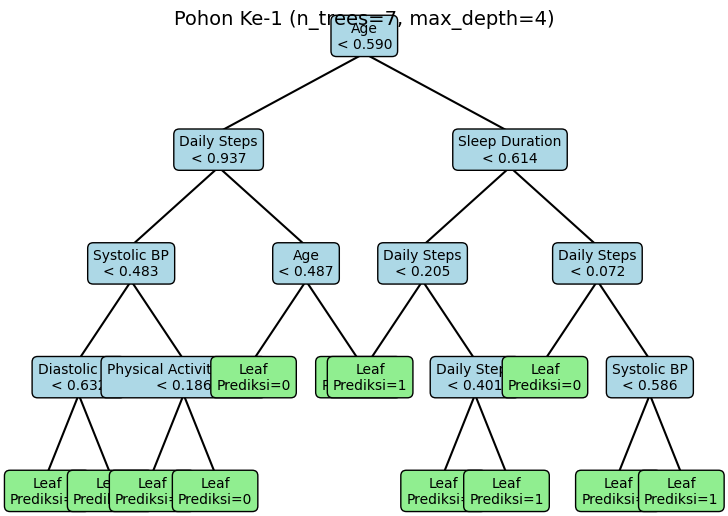

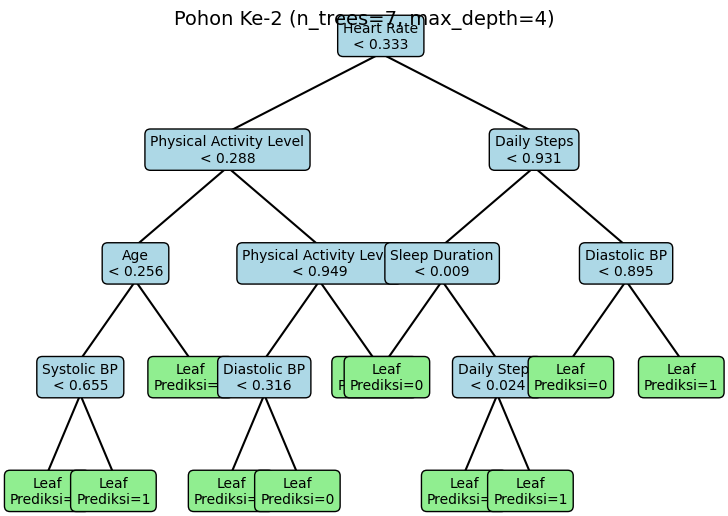

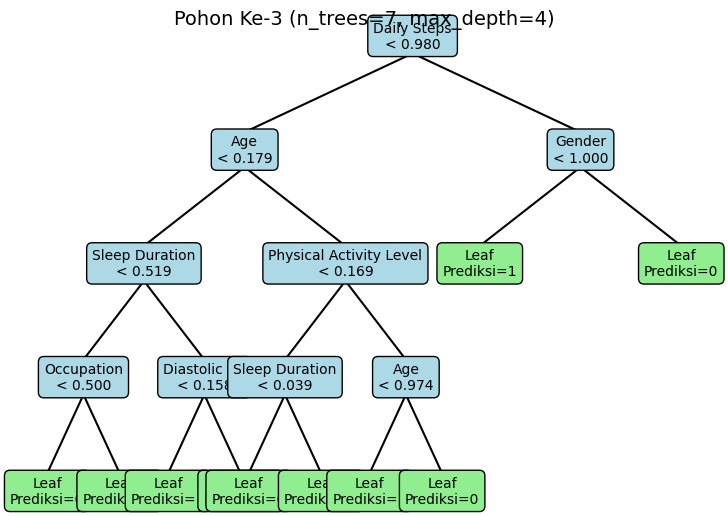

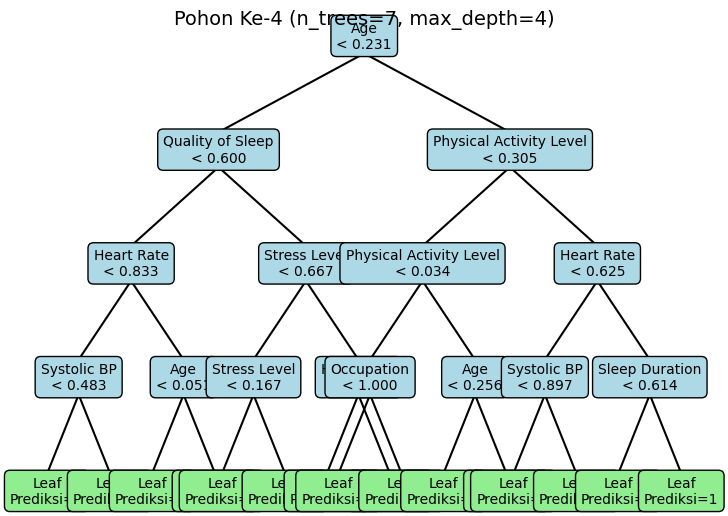

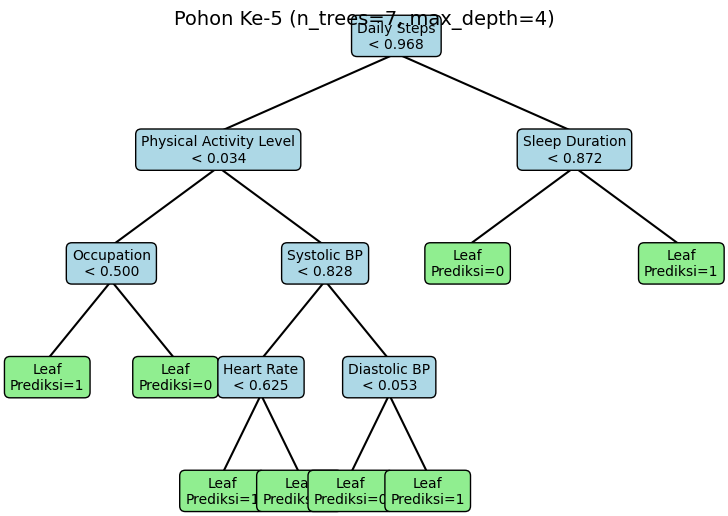

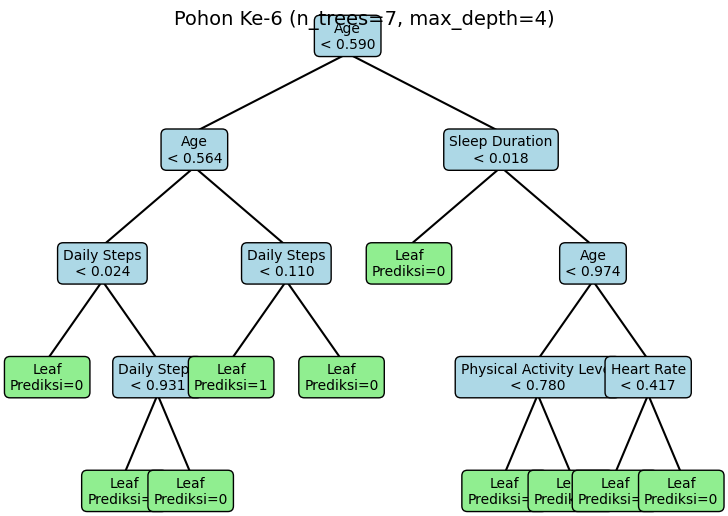

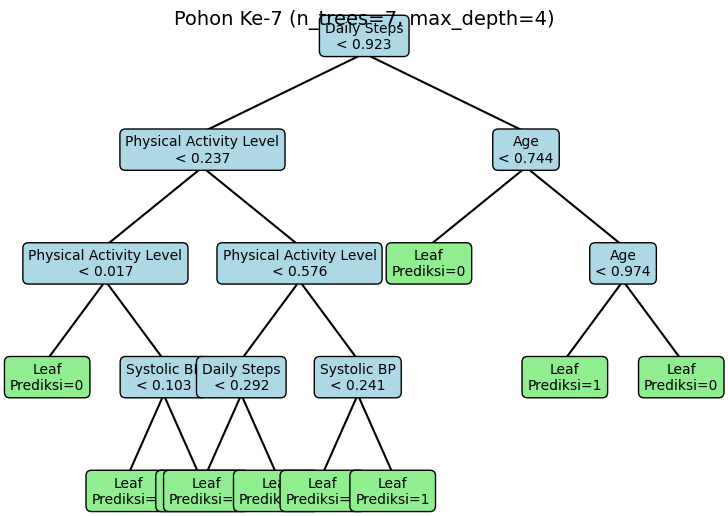

In [31]:
feature_names = numeric_cols   # dari data Anda

# Kombinasi 1
visualize_forest_one_by_one(X, y, n_trees=3, max_depth=2, feature_names=feature_names)

# Kombinasi 2
visualize_forest_one_by_one(X, y, n_trees=5, max_depth=3, feature_names=feature_names)

# Kombinasi 3
visualize_forest_one_by_one(X, y, n_trees=7, max_depth=4, feature_names=feature_names)


In [32]:
import pandas as pd
import numpy as np

# =========================================
# 1. LOAD DATASET
# =========================================
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

# =========================================
# 2. PREPROCESSING
# =========================================

# ---- Gender → numeric
df["Gender"] = df["Gender"].replace({"Male": 1, "Female": 0})

# ---- Sleep Disorder → 3 class
df["Sleep Disorder"] = df["Sleep Disorder"].fillna("None")
df["Sleep Disorder"] = df["Sleep Disorder"].replace({
    "Insomnia": 0,
    "Sleep Apnea": 1,
    "None": 2
})

# ---- Split Blood Pressure “125/83”
df[["BP_Systolic", "BP_Diastolic"]] = df["Blood Pressure"].str.split("/", expand=True)
df["BP_Systolic"] = df["BP_Systolic"].astype(float)
df["BP_Diastolic"] = df["BP_Diastolic"].astype(float)
df = df.drop(columns=["Blood Pressure"])

# ---- Convert Occupation to numeric (label encoding sederhana)
df["Occupation"] = df["Occupation"].astype("category").cat.codes

# ---- Convert other categorical if exist
if "BMI Category" in df.columns:
    df["BMI Category"] = df["BMI Category"].astype("category").cat.codes

# =========================================
# 3. SIAPKAN X & y
# =========================================
numeric_cols = [c for c in df.columns if c != "Sleep Disorder"]
X = df[numeric_cols].values.astype(float)
y = df["Sleep Disorder"].values

# =========================================
# 4. NORMALISASI
# =========================================
X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0) + 1e-9)

# =========================================
# 5. FUNGSI PEMBENTUK DECISION TREE (MANUAL)
# =========================================
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, label=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.label = label

def gini_impurity(y):
    classes = np.unique(y)
    impurity = 1.0
    for c in classes:
        p = np.sum(y == c) / len(y)
        impurity -= p ** 2
    return impurity

def best_split(X, y):
    best_feature, best_thresh = None, None
    best_gini = 999
    n_samples, n_features = X.shape

    for f in range(n_features):
        thresholds = np.unique(X[:, f])
        for t in thresholds:
            left_idx = X[:, f] <= t
            right_idx = X[:, f] > t

            if len(y[left_idx]) == 0 or len(y[right_idx]) == 0:
                continue

            g = (len(y[left_idx]) * gini_impurity(y[left_idx]) +
                 len(y[right_idx]) * gini_impurity(y[right_idx])) / len(y)

            if g < best_gini:
                best_gini = g
                best_feature = f
                best_thresh = t

    return best_feature, best_thresh

def build_tree(X, y, depth=0, max_depth=4):
    if depth >= max_depth or len(np.unique(y)) == 1:
        most_common = np.bincount(y).argmax()
        return Node(label=most_common)

    feature, threshold = best_split(X, y)
    if feature is None:
        most_common = np.bincount(y).argmax()
        return Node(label=most_common)

    left_idx = X[:, feature] <= threshold
    right_idx = X[:, feature] > threshold

    left = build_tree(X[left_idx], y[left_idx], depth+1, max_depth)
    right = build_tree(X[right_idx], y[right_idx], depth+1, max_depth)

    return Node(feature, threshold, left, right)

# =========================================
# 6. RANDOM FOREST MANUAL
# =========================================
def random_forest(X, y, n_trees=4, max_depth=4):
    trees = []
    for _ in range(n_trees):
        idx = np.random.choice(len(X), len(X), replace=True)
        X_boot, y_boot = X[idx], y[idx]
        tree = build_tree(X_boot, y_boot, max_depth=max_depth)
        trees.append(tree)
    return trees

# =========================================
# 7. FUNGSI PRINT TREE
# =========================================
def print_tree(node, feature_names, spacing=""):
    if node.label is not None:
        classes = ["Insomnia", "Sleep Apnea", "None"]
        print(spacing + "Predict →", classes[node.label])
        return

    print(spacing + f"[{feature_names[node.feature]} <= {node.threshold:.3f}]")
    print(spacing + "→ True:")
    print_tree(node.left, feature_names, spacing + "   ")
    print(spacing + "→ False:")
    print_tree(node.right, feature_names, spacing + "   ")

def show_forest_trees(forest, feature_names):
    for i, t in enumerate(forest):
        print("="*40)
        print(f"TREE {i+1}")
        print("="*40)
        print_tree(t, feature_names)
        print("\n")

# =========================================
# 8. TRAIN MODEL RANDOM FOREST (4 TREE, MAX DEPTH 4)
# =========================================
forest = random_forest(X, y, n_trees=4, max_depth=4)

# =========================================
# 9. TAMPILKAN POHON
# =========================================
show_forest_trees(forest, numeric_cols)


FileNotFoundError: [Errno 2] No such file or directory: 'Sleep_health_and_lifestyle_dataset.csv'

In [ ]:
import matplotlib.pyplot as plt

# =========================================================
# Fungsi menggambar tree secara rekursif
# =========================================================

def draw_node(ax, node, x, y, dx, level, feature_names):
    """
    ax     : axes matplotlib
    node   : node decision tree manual
    x, y   : posisi
    dx     : offset horizontal antar node
    level  : kedalaman
    """
    if node.label is not None:
        # NODE LEAF
        classes = ["Insomnia", "Sleep Apnea", "None"]
        ax.text(x, y, f"Leaf:\n{classes[node.label]}",
                ha='center', va='center',
                bbox=dict(boxstyle="round,pad=0.3", fc="orange"))
        return

    # NODE SPLIT
    text = f"{feature_names[node.feature]}\n<= {node.threshold:.3f}"
    ax.text(x, y, text,
            ha='center', va='center',
            bbox=dict(boxstyle="round,pad=0.3", fc="lightblue"))

    # posisi anak
    y_child = y - 1.6
    x_left  = x - dx
    x_right = x + dx

    # Gambar garis ke kiri
    ax.plot([x, x_left], [y-0.2, y_child+0.4], 'k-')
    draw_node(ax, node.left, x_left, y_child, dx/2, level+1, feature_names)

    # Gambar garis ke kanan
    ax.plot([x, x_right], [y-0.2, y_child+0.4], 'k-')
    draw_node(ax, node.right, x_right, y_child, dx/2, level+1, feature_names)


# =========================================================
# Fungsi utama untuk menampilkan 1 tree dalam grafik
# =========================================================
def plot_tree_graph(tree, feature_names):
    fig, ax = plt.subplots(figsize=(14, 8))
    ax.axis('off')

    draw_node(ax, tree, x=0, y=0, dx=4, level=0, feature_names=feature_names)

    plt.title("Decision Tree Visualization")
    plt.show()


# =========================================================
# CONTOH PEMANGGILAN:
# =========================================================
# plot_tree_graph(forest[0], numeric_cols)   # tampilkan pohon pertama



=== TREE 1 ===


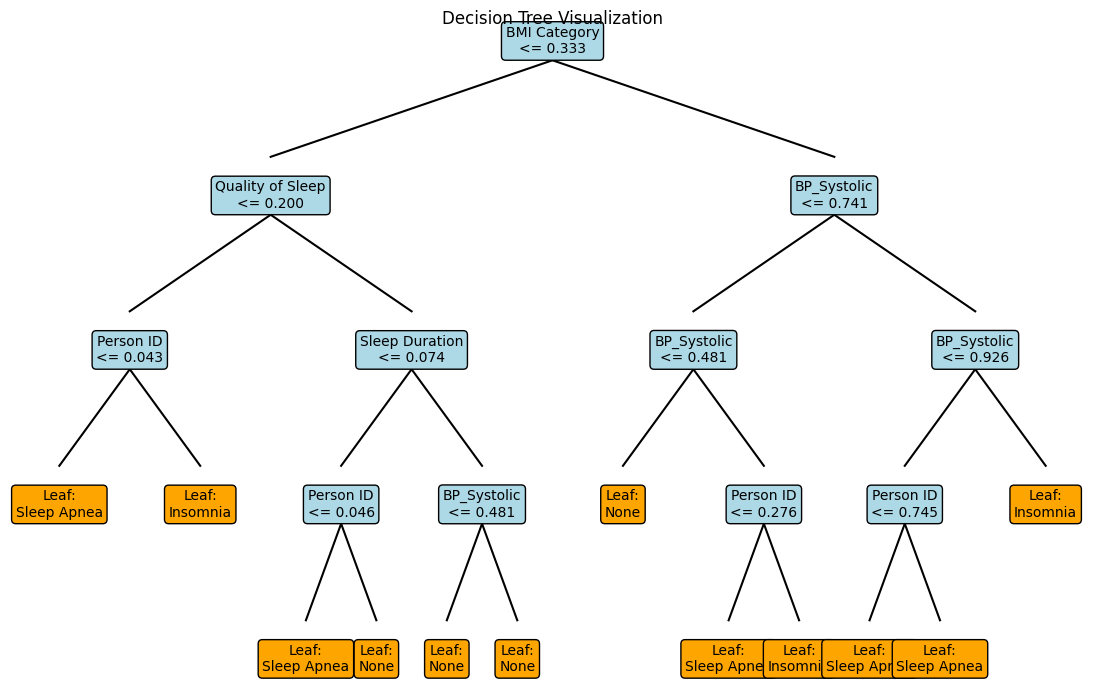


=== TREE 2 ===


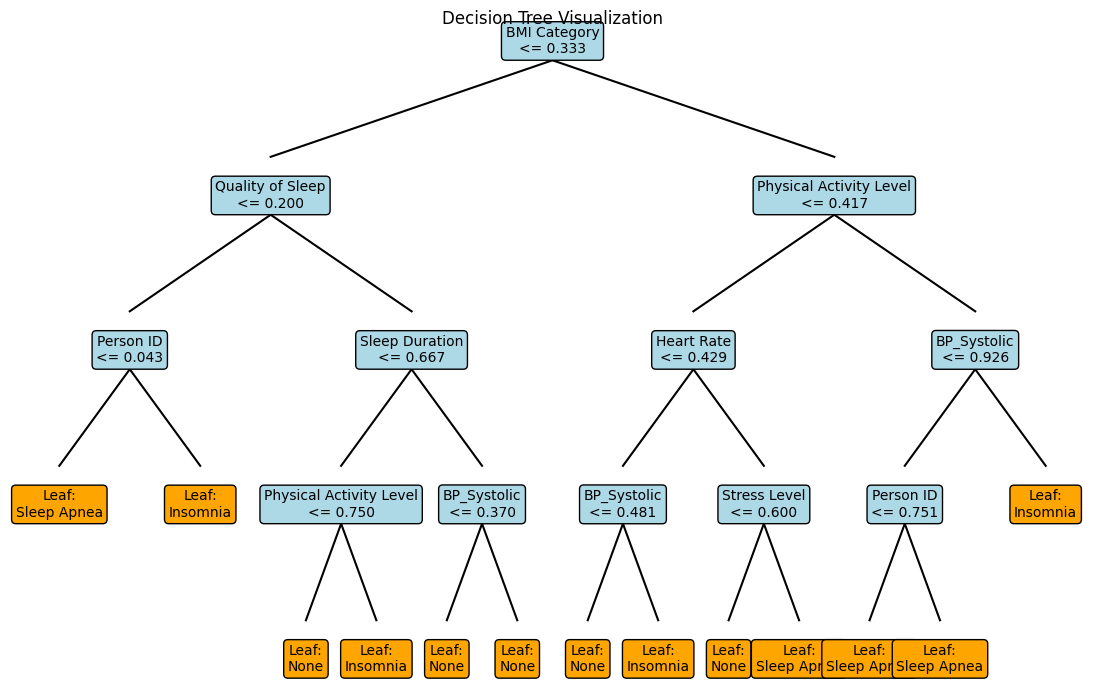


=== TREE 3 ===


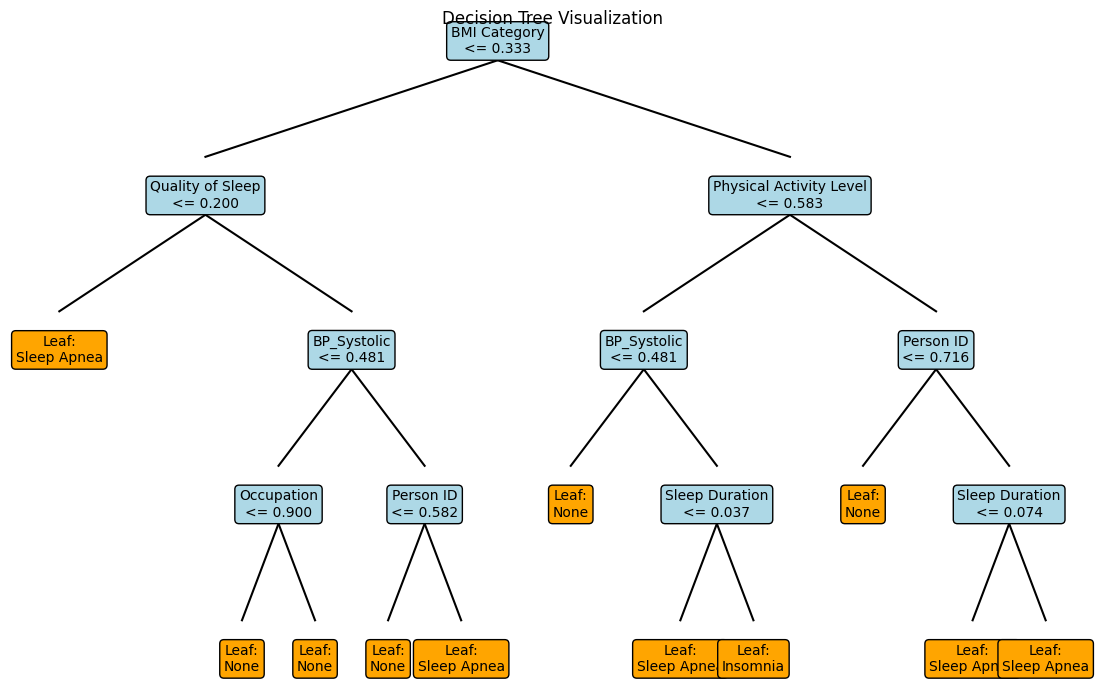


=== TREE 4 ===


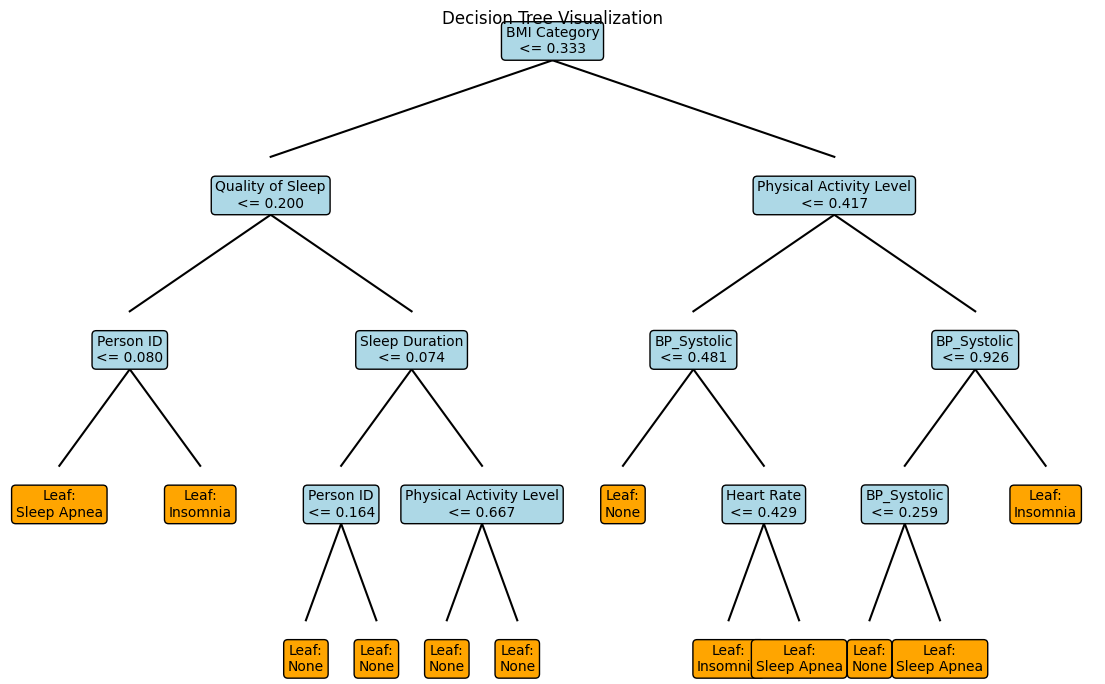

In [ ]:
for i, t in enumerate(forest):
    print(f"\n=== TREE {i+1} ===")
    plot_tree_graph(t, numeric_cols)
